Evaluating Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2298/4232534483.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


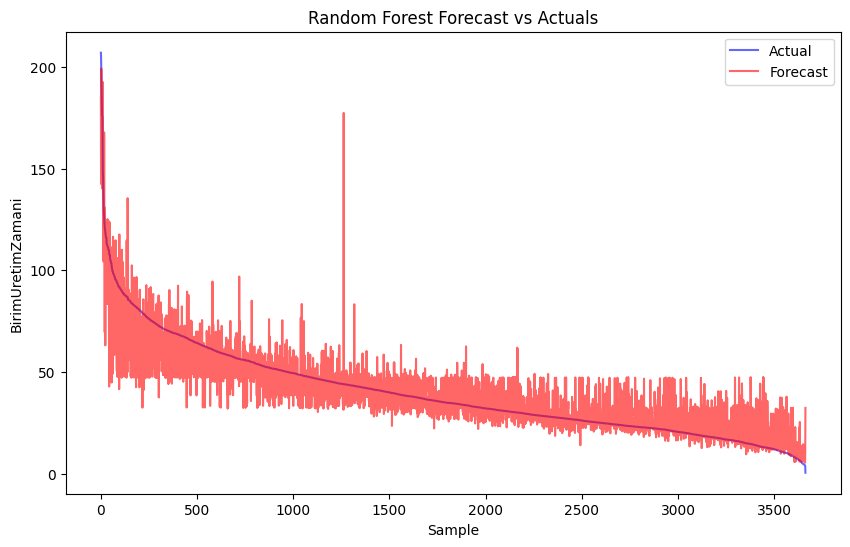

Evaluating KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


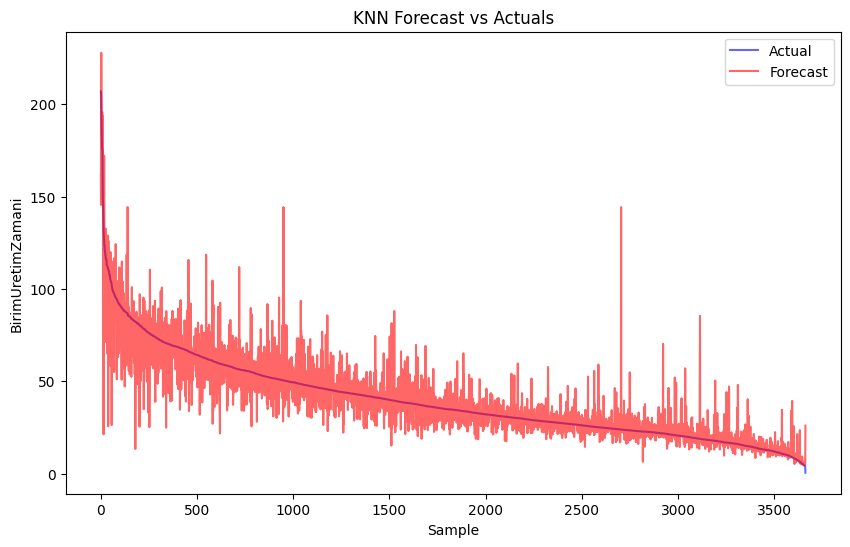

Evaluating xGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


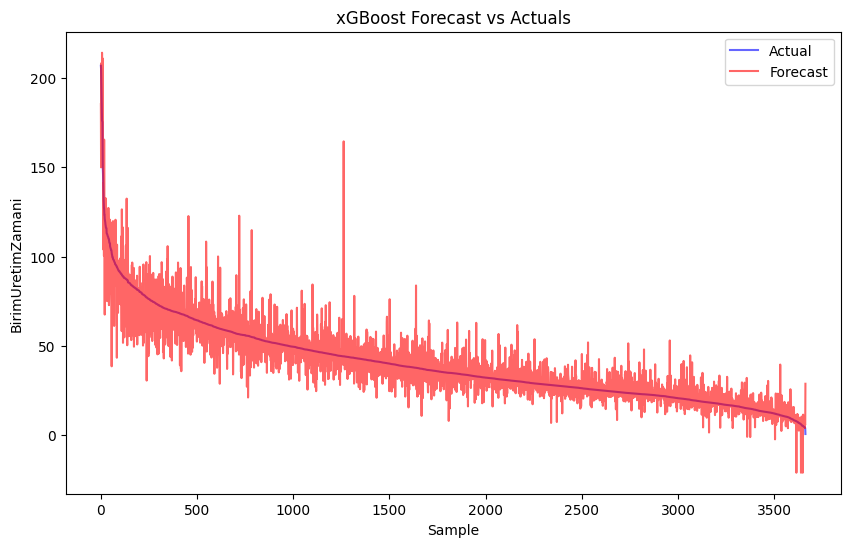

Evaluating CatBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


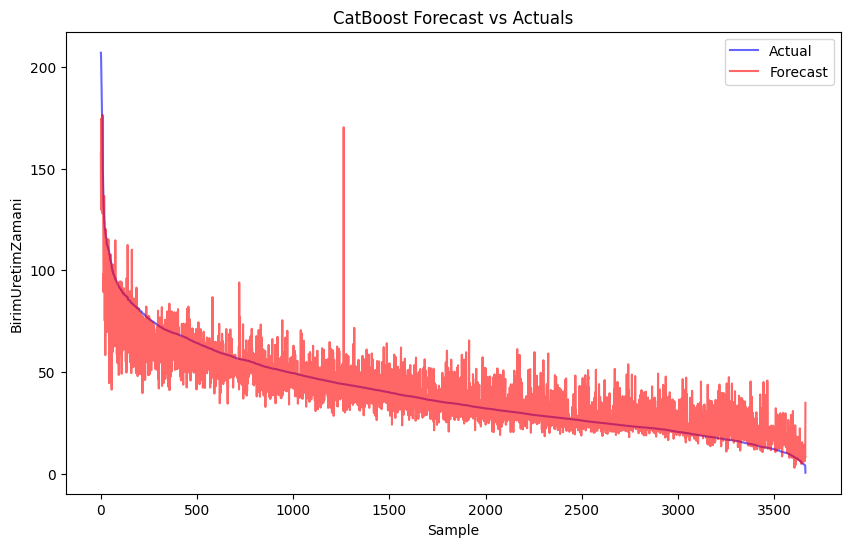

Evaluating LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 589
[LightGBM] [Info] Start training from score 40.032602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 586
[LightGBM] [Info] Start training from score 39.874616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.234792 seconds.
You can set `force_row_wise=true` to remove the overhead.
An

/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.339803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 14656, number of used features: 577
[LightGBM] [Info] Start training from score 40.039839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 580
[LightGBM] [Info] Start training from score 39.977443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.290419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

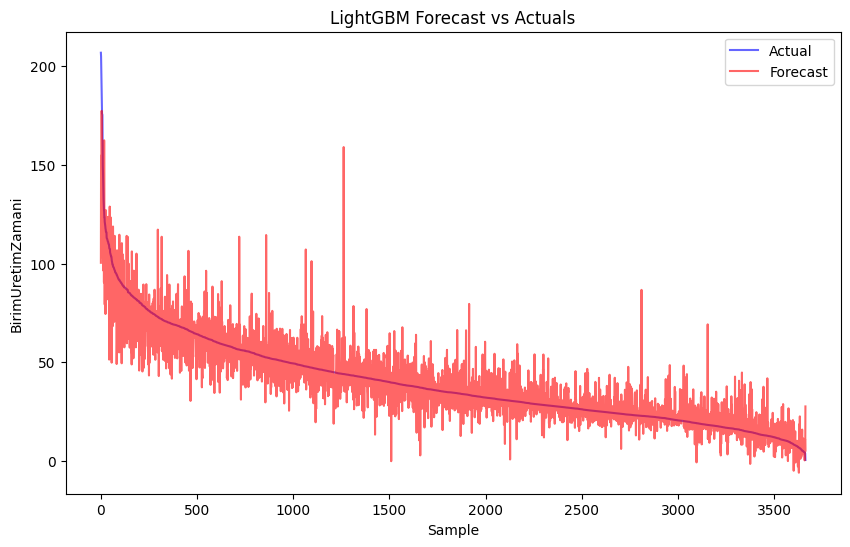

Evaluating GBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


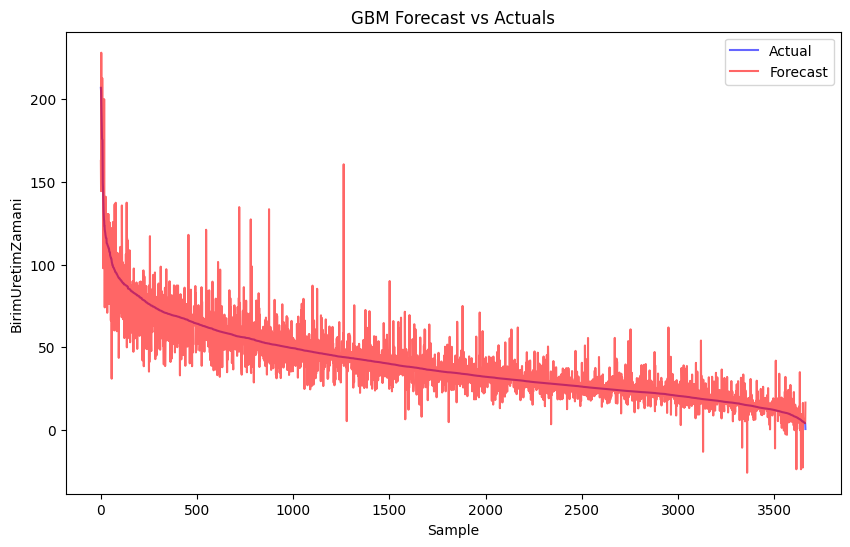

Evaluating Neural Network...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:128: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/hom

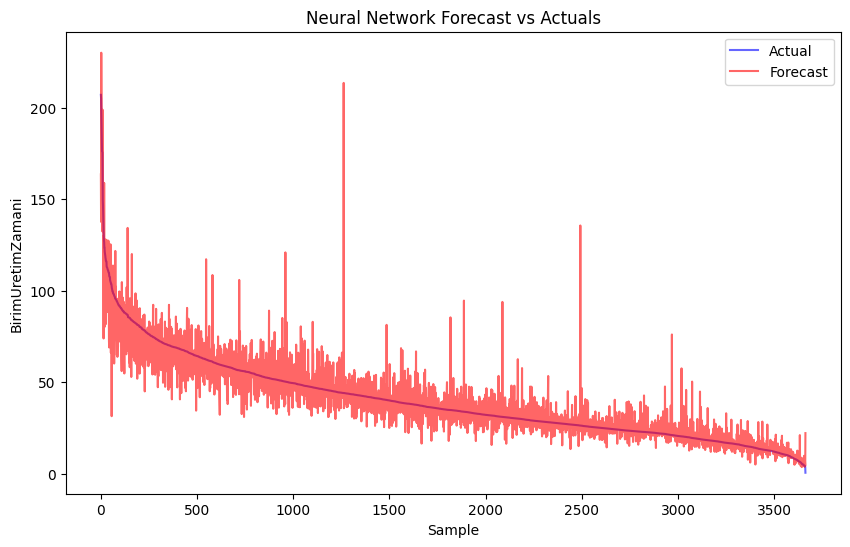

            Model  Overall MAPE
0   Random Forest      0.230533
1             KNN      0.164957
2         xGBoost      0.174896
3        CatBoost      0.233854
4        LightGBM      0.192466
5             GBM      0.183805
6  Neural Network      0.159364


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
X = pd.get_dummies(X, columns=[' ', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi'])

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiperparametre aramaları için random search space
param_distributions = {
    'Random Forest': {
        'n_estimators': np.arange(50, 201, 50),
        'max_depth': np.arange(5, 21, 5),
        'min_samples_split': np.arange(2, 11, 2),
        'min_samples_leaf': np.arange(1, 11, 2)
    },
    'KNN': {
        'n_neighbors': np.arange(3, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'xGBoost': {
        'max_depth': np.arange(3, 11, 2),
        'learning_rate': np.logspace(-3, 0, num=4),
        'n_estimators': np.arange(50, 201, 50)
    },
    'CatBoost': {
        'depth': np.arange(4, 11, 2),
        'learning_rate': np.logspace(-3, 0, num=4),
        'iterations': np.arange(50, 201, 50)
    },
    'LightGBM': {
        'num_leaves': np.arange(20, 150, 30),
        'learning_rate': np.logspace(-3, 0, num=4),
        'n_estimators': np.arange(50, 201, 50)
    },
    'GBM': {
        'n_estimators': np.arange(50, 201, 50),
        'learning_rate': np.logspace(-3, 0, num=4),
        'max_depth': np.arange(3, 11, 2)
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': np.logspace(-4, 0, num=5),
        'learning_rate_init': np.logspace(-3, 0, num=4)
    }
}

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1),
    'GBM': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tüm modeller için MAPE sonuçlarını saklamak için bir DataFrame
results = pd.DataFrame(columns=['Model', 'Overall MAPE'])

# Tüm modelleri optimize edip eğitiyoruz
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # RandomizedSearchCV ile en iyi modeli bul
    random_search = RandomizedSearchCV(model, param_distributions[model_name], 
                                       n_iter=10,  
                                       cv=kf, 
                                       scoring='neg_mean_absolute_percentage_error', 
                                       n_jobs=-1, 
                                       random_state=42, 
                                       verbose=1)
    
    random_search.fit(X_scaled, y)
    
    best_model = random_search.best_estimator_
    
    # Performans ölçümleri için MAPE hesaplayalım
    mape_scores = []
    
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Modeli en iyi parametrelerle eğit
        best_model.fit(X_train, y_train)
        
        # Tahmin yap
        y_pred = best_model.predict(X_test)
        
        # MAPE hesapla
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)
    
    # Genel ortalama MAPE'yi hesaplayalım
    overall_mape = np.mean(mape_scores)
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'Overall MAPE': [overall_mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)
    
    # Performansı görselleştirelim
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    ax.plot(range(len(y_pred)), y_pred, label='Forecast', color='red', alpha=0.6)
    ax.set_title(f'{model_name} Forecast vs Actuals')
    ax.set_xlabel('Sample')
    ax.set_ylabel('BirimUretimZamani')
    ax.legend()
    plt.show()

# Sonuçların tablo olarak gösterilmesi
print(results)


Evaluating Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2298/1537716096.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


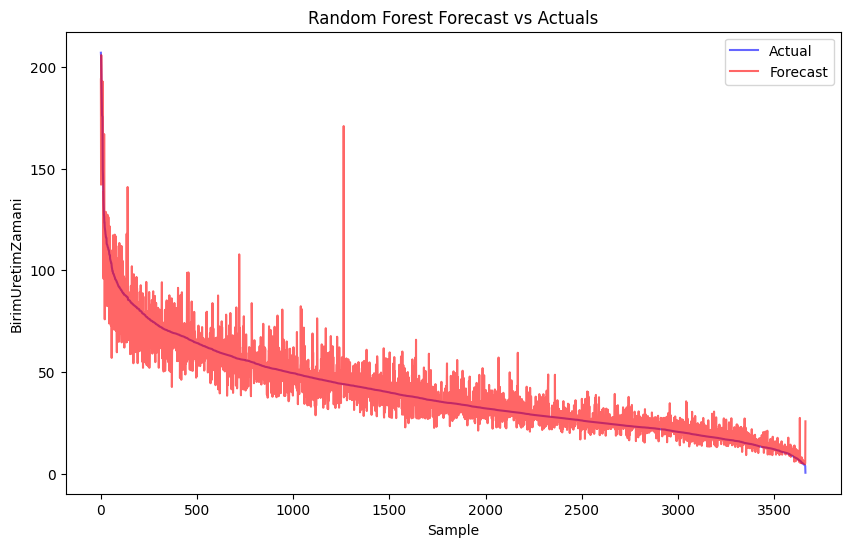

Evaluating KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


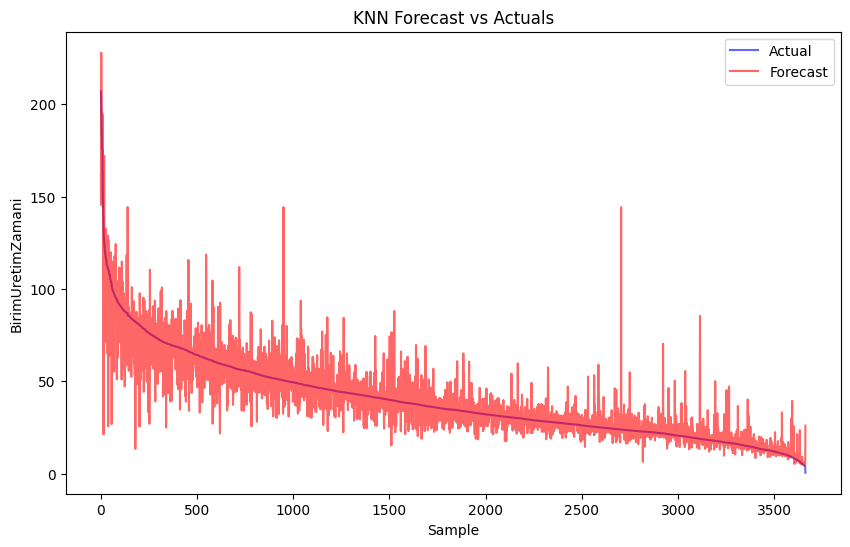

Evaluating xGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


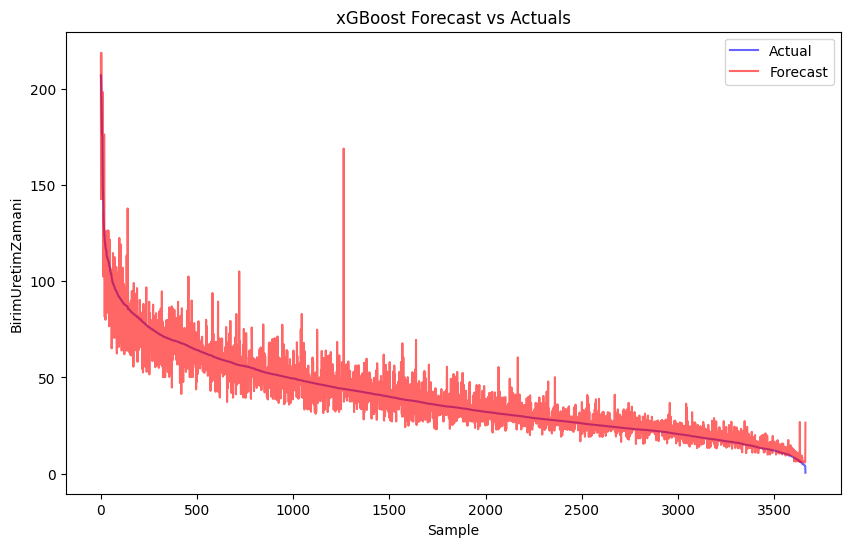

Evaluating CatBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


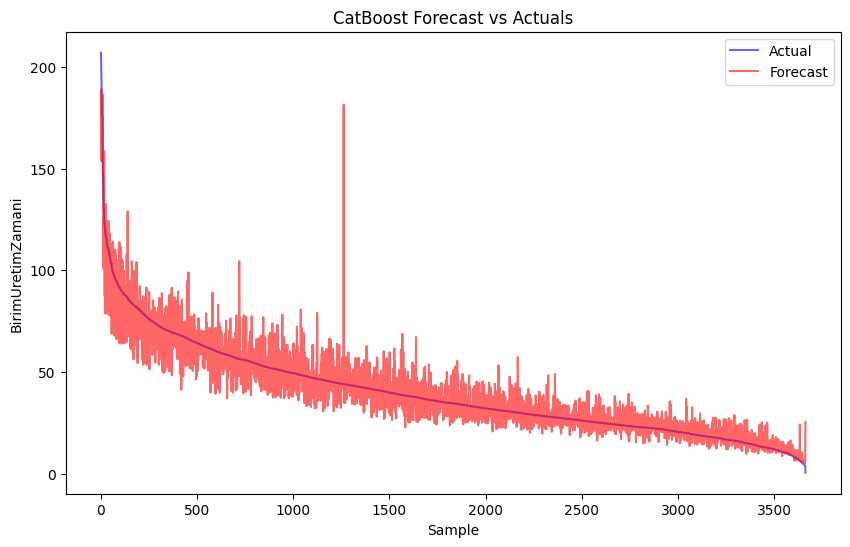

Evaluating LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2078
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 581
[LightGBM] [Info] Start training from score 39.977443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.311614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 590
[LightGBM] [Info] Start training from score 40.032602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.291578 secon

/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 14655, number of used features: 590
[LightGBM] [Info] Start training from score 40.032602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.335179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 14656, number of used features: 578
[LightGBM] [Info] Start training from score 40.039839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.259622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

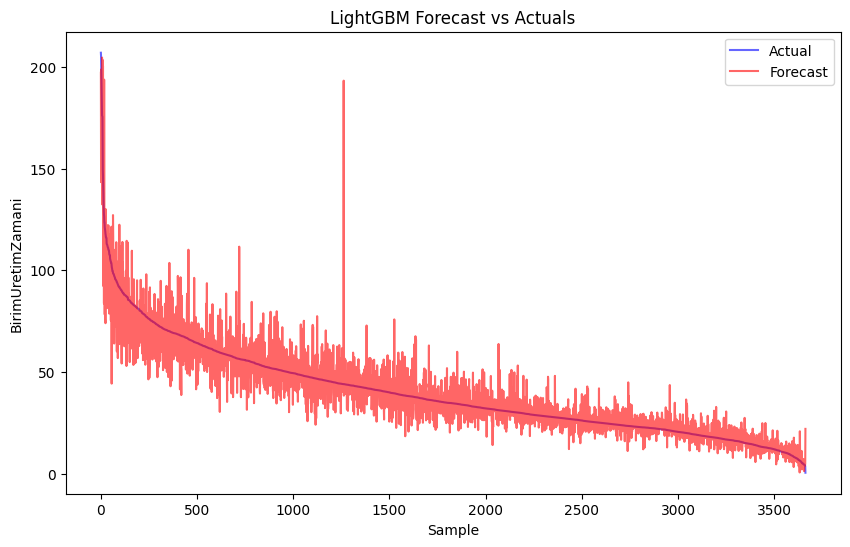

Evaluating GBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


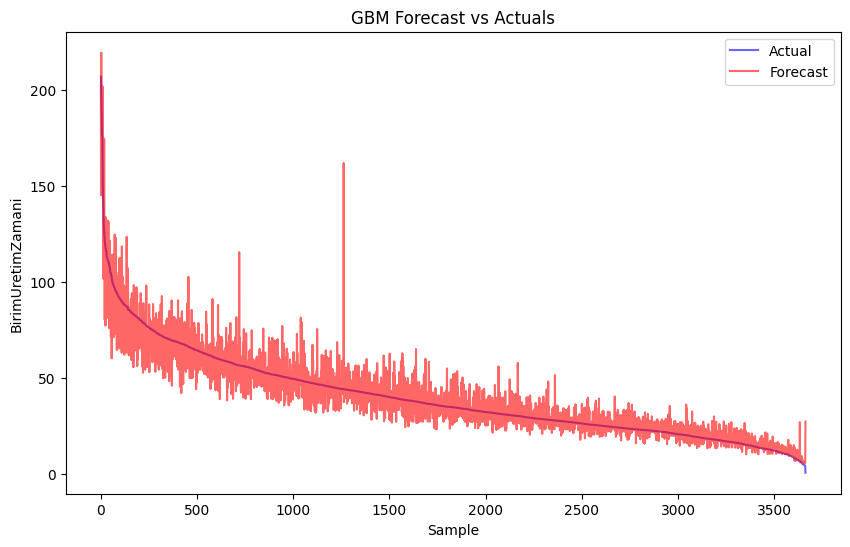

Evaluating Neural Network...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:128: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/hom

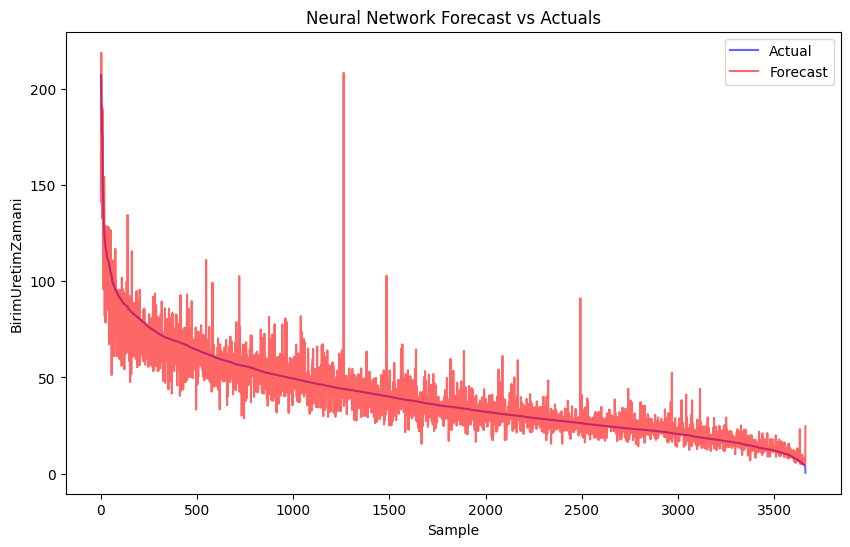

            Model  Overall MAPE
0   Random Forest      0.139789
1             KNN      0.161775
2         xGBoost      0.143029
3        CatBoost      0.149822
4        LightGBM      0.151268
5             GBM      0.142418
6  Neural Network      0.150562


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim','Etut']]
y = data['BirimUretimZamani']  # Hedef değişken

# Kategorik değişkenleri sayısallaştırma (One-hot encoding)
X = pd.get_dummies(X, columns=['UretimID', 'ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi'])

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiperparametre aramaları için random search space
param_distributions = {
    'Random Forest': {
        'n_estimators': np.arange(50, 201, 50),
        'max_depth': np.arange(5, 21, 5),
        'min_samples_split': np.arange(2, 11, 2),
        'min_samples_leaf': np.arange(1, 11, 2)
    },
    'KNN': {
        'n_neighbors': np.arange(3, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'xGBoost': {
        'max_depth': np.arange(3, 11, 2),
        'learning_rate': np.logspace(-3, 0, num=4),
        'n_estimators': np.arange(50, 201, 50)
    },
    'CatBoost': {
        'depth': np.arange(4, 11, 2),
        'learning_rate': np.logspace(-3, 0, num=4),
        'iterations': np.arange(50, 201, 50)
    },
    'LightGBM': {
        'num_leaves': np.arange(20, 150, 30),
        'learning_rate': np.logspace(-3, 0, num=4),
        'n_estimators': np.arange(50, 201, 50)
    },
    'GBM': {
        'n_estimators': np.arange(50, 201, 50),
        'learning_rate': np.logspace(-3, 0, num=4),
        'max_depth': np.arange(3, 11, 2)
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': np.logspace(-4, 0, num=5),
        'learning_rate_init': np.logspace(-3, 0, num=4)
    }
}

# Modelleri tanımlayalım
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'xGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'CatBoost': cb.CatBoostRegressor(random_state=42, silent=True),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1),
    'GBM': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tüm modeller için MAPE sonuçlarını saklamak için bir DataFrame
results = pd.DataFrame(columns=['Model', 'Overall MAPE'])

# Tüm modelleri optimize edip eğitiyoruz
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # RandomizedSearchCV ile en iyi modeli bul
    random_search = RandomizedSearchCV(model, param_distributions[model_name], 
                                       n_iter=10,  
                                       cv=kf, 
                                       scoring='neg_mean_absolute_percentage_error', 
                                       n_jobs=-1, 
                                       random_state=42, 
                                       verbose=1)
    
    random_search.fit(X_scaled, y)
    
    best_model = random_search.best_estimator_
    
    # Performans ölçümleri için MAPE hesaplayalım
    mape_scores = []
    
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Modeli en iyi parametrelerle eğit
        best_model.fit(X_train, y_train)
        
        # Tahmin yap
        y_pred = best_model.predict(X_test)
        
        # MAPE hesapla
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)
    
    # Genel ortalama MAPE'yi hesaplayalım
    overall_mape = np.mean(mape_scores)
    
    # Sonuçları bir DataFrame olarak oluşturup sonuçlar DataFrame'ine ekleyelim
    result_row = pd.DataFrame({
        'Model': [model_name],
        'Overall MAPE': [overall_mape]
    })
    results = pd.concat([results, result_row], ignore_index=True)
    
    # Performansı görselleştirelim
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
    ax.plot(range(len(y_pred)), y_pred, label='Forecast', color='red', alpha=0.6)
    ax.set_title(f'{model_name} Forecast vs Actuals')
    ax.set_xlabel('Sample')
    ax.set_ylabel('BirimUretimZamani')
    ax.legend()
    plt.show()

# Sonuçların tablo olarak gösterilmesi
print(results)
